# WeatherPy
----

#### Analysis
* The "City Latitude vs. Max Temperature" plot confirms the hypothesis that temperatures are warmer closer to the equator. Cities with latitudes closer to 0 are reported to have generally warmer temps. However, this is the trend, not the rule. There are cities further from the equator with higher max temperatures than cities closer to the equator.
* Cloudiness doesn't seem to be related to temperature. In the "City Latitude vs. Cloudiness" plot, the cloudiness percentage is all over for cities at every latitude. As mentioned above, cities closer to a latitude of 0 still generally have a higher temperature seemingly no matter the cloudiness.
* There is a noticeable humidity increase for cities closer to the equator. This isn't surprising, as when you think of a tropical, equatorial city you typically associate it with humidity. Cities far from the equator also have 100% humidity, so humidity doesn't seem to have a significant effect on overall temperature.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# create the dataframe to hold city info
cities_df = pd.DataFrame({"City":cities})
cities_df['Cloudiness'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Wind Speed'] = ''

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
count = 1

# instantiate the lists to hold the data for each city
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:    
        # assemble url and make API request
        print(f"Processing Record {count} of Set 1 | {city}.")
        count = count + 1
        
        target_url = ("http://api.openweathermap.org/data/2.5/weather?"
                      'appid={0}&q={1}').format(api_key,city)
        try:
            # extract results
            response = requests.get(target_url).json()
            
            # add the city info to the lists             
            city_list.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            
        except:
            print("City not found. Skipping...")

Processing Record 1 of Set 1 | plettenberg bay.
Processing Record 2 of Set 1 | asau.
City not found. Skipping...
Processing Record 3 of Set 1 | hithadhoo.
Processing Record 4 of Set 1 | diu.
Processing Record 5 of Set 1 | dikson.
Processing Record 6 of Set 1 | cherskiy.
Processing Record 7 of Set 1 | bluff.
Processing Record 8 of Set 1 | ushuaia.
Processing Record 9 of Set 1 | dunedin.
Processing Record 10 of Set 1 | luderitz.
Processing Record 11 of Set 1 | ribeira grande.
Processing Record 12 of Set 1 | airai.
Processing Record 13 of Set 1 | krasnoselkup.
City not found. Skipping...
Processing Record 14 of Set 1 | mataura.
Processing Record 15 of Set 1 | mount gambier.
Processing Record 16 of Set 1 | belmonte.
Processing Record 17 of Set 1 | cabatuan.
Processing Record 18 of Set 1 | alta floresta.
Processing Record 19 of Set 1 | katsuura.
Processing Record 20 of Set 1 | hermanus.
Processing Record 21 of Set 1 | albany.
Processing Record 22 of Set 1 | bambous virieux.
Processing Recor

Processing Record 180 of Set 1 | lorengau.
Processing Record 181 of Set 1 | kodinsk.
Processing Record 182 of Set 1 | matara.
Processing Record 183 of Set 1 | saskylakh.
Processing Record 184 of Set 1 | olinda.
Processing Record 185 of Set 1 | dalbandin.
Processing Record 186 of Set 1 | ogembo.
Processing Record 187 of Set 1 | ardakan.
Processing Record 188 of Set 1 | fortuna.
Processing Record 189 of Set 1 | gizo.
Processing Record 190 of Set 1 | kabinda.
Processing Record 191 of Set 1 | road town.
Processing Record 192 of Set 1 | karratha.
Processing Record 193 of Set 1 | bengkulu.
City not found. Skipping...
Processing Record 194 of Set 1 | san-pedro.
Processing Record 195 of Set 1 | abu jubayhah.
City not found. Skipping...
Processing Record 196 of Set 1 | lebu.
Processing Record 197 of Set 1 | butaritari.
Processing Record 198 of Set 1 | mandalgovi.
Processing Record 199 of Set 1 | seravezza.
Processing Record 200 of Set 1 | arman.
Processing Record 201 of Set 1 | zhigansk.
Proces

Processing Record 358 of Set 1 | amarillo.
Processing Record 359 of Set 1 | alyangula.
Processing Record 360 of Set 1 | takoradi.
Processing Record 361 of Set 1 | barcelona.
Processing Record 362 of Set 1 | chara.
Processing Record 363 of Set 1 | vasai.
Processing Record 364 of Set 1 | kurumkan.
Processing Record 365 of Set 1 | brae.
Processing Record 366 of Set 1 | chhaprauli.
Processing Record 367 of Set 1 | santa cruz de tenerife.
Processing Record 368 of Set 1 | constitucion.
Processing Record 369 of Set 1 | sao felix do xingu.
Processing Record 370 of Set 1 | xinqing.
Processing Record 371 of Set 1 | balimo.
City not found. Skipping...
Processing Record 372 of Set 1 | lebane.
Processing Record 373 of Set 1 | yagodnoye.
Processing Record 374 of Set 1 | yeppoon.
Processing Record 375 of Set 1 | kapustin yar.
Processing Record 376 of Set 1 | eyl.
Processing Record 377 of Set 1 | debre tabor.
Processing Record 378 of Set 1 | bambanglipuro.
Processing Record 379 of Set 1 | wynyard.
Pro

Processing Record 540 of Set 1 | ziro.
Processing Record 541 of Set 1 | idanre.
Processing Record 542 of Set 1 | codrington.
Processing Record 543 of Set 1 | lavumisa.
Processing Record 544 of Set 1 | santa rosa.
Processing Record 545 of Set 1 | mittersill.
Processing Record 546 of Set 1 | morant bay.
Processing Record 547 of Set 1 | kidal.
Processing Record 548 of Set 1 | vilhena.
Processing Record 549 of Set 1 | seminole.
Processing Record 550 of Set 1 | djibo.
Processing Record 551 of Set 1 | morgan city.
Processing Record 552 of Set 1 | eenhana.
Processing Record 553 of Set 1 | cap-aux-meules.
Processing Record 554 of Set 1 | azangaro.
Processing Record 555 of Set 1 | umm jarr.
City not found. Skipping...
Processing Record 556 of Set 1 | prachuap khiri khan.
Processing Record 557 of Set 1 | kindu.
Processing Record 558 of Set 1 | de-kastri.
Processing Record 559 of Set 1 | deh rawud.
City not found. Skipping...
Processing Record 560 of Set 1 | port hardy.
Processing Record 561 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# convert the max temp to F from Kelvin
max_temp = [(9/5)*(x - 273) + 32 for x in max_temp]

# populate the dataframe with the city info
city_df = pd.DataFrame({
                            "City":city_list,
                            "Cloudiness":cloudiness,
                            "Country":country,
                            "Date":date,
                            "Humidity":humidity,
                            "Lat":lat,
                            "Lng":lng,
                            "Max Temp":max_temp,
                            "Wind Speed":wind_speed
    
})

# write the dataframe to a csv
city_df.to_csv("cities.csv")
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Plettenberg Bay,33,ZA,1561347359,84,-34.05,23.37,51.4814,1.34
1,Hithadhoo,31,MV,1561347359,67,-0.60,73.08,84.9074,4.69
2,Diu,25,IN,1561347360,67,20.71,70.98,84.9074,3.31
3,Dikson,80,RU,1561347360,88,73.51,80.55,40.8434,6.09
4,Cherskiy,32,RU,1561347360,29,68.75,161.30,74.8814,2.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

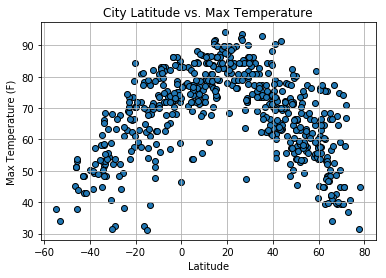

In [5]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature')
ax.scatter(city_df['Lat'],city_df['Max Temp'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_max_temp.png')

#### Latitude vs. Humidity Plot

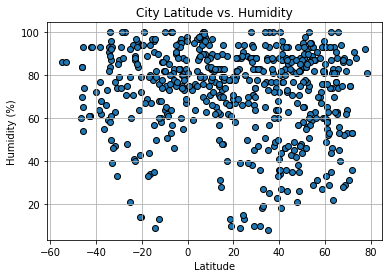

In [6]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax.set_title('City Latitude vs. Humidity')
ax.scatter(city_df['Lat'],city_df['Humidity'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

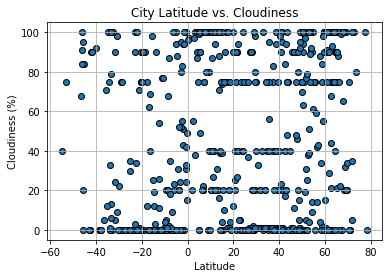

In [7]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs. Cloudiness')
ax.scatter(city_df['Lat'],city_df['Cloudiness'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

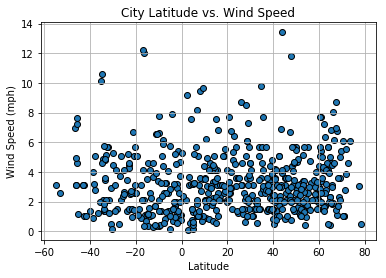

In [8]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed')
ax.scatter(city_df['Lat'],city_df['Wind Speed'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_wind_speed.png')